In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
from numpy import diff

In [21]:
data = pd.read_csv("ring_down/ring_down_05.txt", sep = "\t", skiprows = range(0,1))

In [22]:
print(data)
print(type(data))

              (us)        (mV)
0      -250.001991  211.752600
1      -250.000991  211.752600
2      -249.999991  211.752600
3      -249.998991  216.350900
4      -249.997991  216.350900
...            ...         ...
499999  249.996995   13.810280
500000  249.997995    9.196604
500001  249.998995   13.810280
500002  249.999995   13.810280
500003  250.000995   13.810280

[500004 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


RangeIndex(start=0, stop=500004, step=1)
[245002 245003 245004 ... 500001 500002 500003]
[255002 255003 255004 ... 500001 500002 500003]
245002
[-22.42382767 109.09844739]


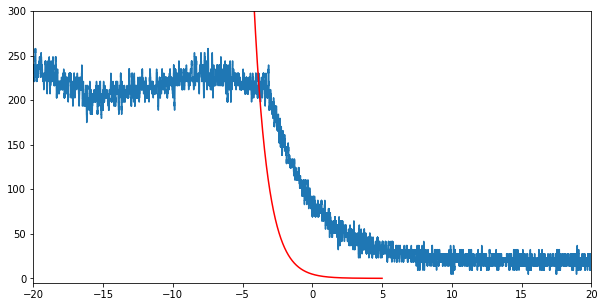

In [23]:
plt.figure(figsize = (10,5))
x = data['(us)']
y = data['(mV)']
plt.plot(x, y)
plt.xlim([-20, 20])
plt.ylim([-5, 300])
print(x.index)
print(data[data['(us)']>=-5].index.values)
print(data[data['(us)']>=5].index.values)


xnp = x.to_numpy()
ynp = y.to_numpy()

start = np.where(xnp>=-5)
print(start[0][0])
xnp1 = xnp[245002:255002]
ynp1 = ynp[245002:255002]

curve_fit = np.polyfit(xnp1, ynp1, 1)
print(curve_fit)
fit = np.log(109)*np.exp(-xnp1) 

plt.plot(xnp1, fit, color = "red")
plt.show()

# xnp1 = np.arange(np.where(xnp>=-5)[0], np.where(xnp>=5)[0])
# print(xnp1)


# print(np.where(xnp>=10))
# print(xnp.index[-20])

# xnp = x.to_numpy()
# ynp = y.to_numpy()
# print(xnp.index(-20)
# fit = np.polyfit(x, np.log(y), 1)
# plt.fit()

# def exp_decay(t, a, tau, b):
#     return a*np.exp(-t/tau) + b
# popt, pcov = scipy.optimize.curve_fit(exp_decay, x, y_noisy)

# xnp = xnp.range(-10,10)
# curve_fit = np.polyfit(x, y, 1)
# print(curve_fit)
# fit = np.exp(-0.605*xnp)
# plt.plot(xnp, fit, color = "red")
      

# Writing clean code again

246802
255002
[-3.19999791 -3.19899791 -3.19799791 ...  4.99700185  4.99800185
  4.99900185]
[0. 0. 0. ... 0. 0. 0.]
64.77033729702055 0.34342397170471417 20.86239854659667


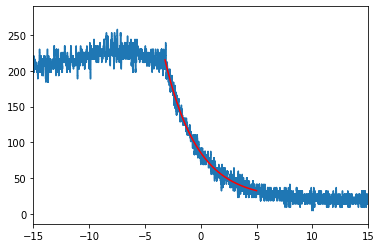

In [59]:
x = data['(us)']
y = data['(mV)']

xnp = x.to_numpy()
ynp = y.to_numpy()

start = np.where(xnp>=-3.2)
print(start[0][0])
end = np.where(xnp>=5)
print(end[0][0])
xnp1 = xnp[start[0][0]:end[0][0]]
ynp1 = ynp[start[0][0]:end[0][0]]
print(xnp1)

# Calculating the derivative 
dydx = diff(ynp1) / diff(xnp1)
print(dydx) #does not work


def exp_decay(t, a, k, c):
    return a * np.exp(-k * t) + c

def fit_nonlinear(t, y):
    opt_para, para_cov = sp.optimize.curve_fit(exp_decay, t, y, maxfev = 5000)
    a, k, c = opt_para
    return a, k, c

a, k, c = fit_nonlinear(xnp1, ynp1)
print(a, k, c)
fit = exp_decay(xnp1, a, k ,c)

plt.plot(x, y)
plt.plot(xnp1, fit, color = "red")
plt.xlim(-15, 15)
plt.show()